In [7]:
!python --version
%pip install numpy==2.0.2 -q
%pip install pandas==2.2.2 -q
%pip install pm4py==2.7.11.13 -q

Python 3.9.2
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:

import pm4py
import numpy as np
import pandas as pd


In [11]:

df = pd.read_csv('EC 1 - Purchasing.csv', sep=';')


### Exploratory Data Analysis

In [12]:

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9119 entries, 0 to 9118
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Case ID             9119 non-null   int64 
 1   Start Timestamp     9119 non-null   object
 2   Complete Timestamp  9119 non-null   object
 3   Activity            9119 non-null   object
 4   Resource            9119 non-null   object
 5   Role                9119 non-null   object
dtypes: int64(1), object(5)
memory usage: 427.6+ KB


,Case ID,Start Timestamp,Complete Timestamp,Activity,Resource,Role
0,1,2011/01/01 00:00:00.000,2011/01/01 00:37:00.000,Create Purchase Requisition,Kim Passa,Requester
1,2,2011/01/01 00:16:00.000,2011/01/01 00:29:00.000,Create Purchase Requisition,Immanuel Karagianni,Requester
2,3,2011/01/01 02:23:00.000,2011/01/01 03:03:00.000,Create Purchase Requisition,Kim Passa,Requester
3,1,2011/01/01 05:37:00.000,2011/01/01 05:45:00.000,Create Request for Quotation,Kim Passa,Requester
4,1,2011/01/01 06:41:00.000,2011/01/01 06:55:00.000,Analyze Request for Quotation,Karel de Groot,Purchasing Agent


In [13]:


df['Case ID'].describe()


count    9119.000000
mean      517.533501
std       439.822090
min         1.000000
25%       142.000000
50%       383.000000
75%       833.500000
max      1949.000000
Name: Case ID, dtype: float64

In [14]:
df['Activity'].value_counts()

Activity
Analyze Request for Quotation             1107
Create Purchase Requisition                608
Amend Request for Quotation                563
Create Request for Quotation               544
Release Purchase Order                     439
Send Request for Quotation to Supplier     413
Create Quotation comparison Map            413
Choose best option                         413
Analyze Quotation Comparison Map           413
Confirm Purchase Order                     413
Create Purchase Order                      413
Deliver Goods Services                     413
Settle Conditions With Supplier            413
Pay Invoice                                413
Approve Purchase Order for payment         413
Send Invoice                               413
Authorize Supplier's Invoice payment       413
Release Supplier's Invoice                 403
Analyze Purchase Requisition               382
Settle Dispute With Supplier               106
Amend Purchase Requisition                  11
Name

In [15]:
df['Resource'].value_counts()

Resource
Magdalena Predutta     1089
Karel de Groot         1076
Francois de Perrier    1033
Pedro Alvares           681
Karalda Nimwada         628
Kiu Kan                 308
Carmen Finacse          259
Maris Freeman           251
Francis Odell           251
Heinz Gutschmidt        236
Esmeralda Clay          230
Karen Clarens           224
Sean Manney             218
Anne Olwada             199
Nico Ojenbeer           195
Fjodor Kowalski         195
Tesca Lobes             194
Miu Hanwan              194
Penn Osterwalder        194
Immanuel Karagianni     193
Kim Passa               192
Alberto Duport          188
Christian Francois      187
Esmana Liubiata         183
Clement Duchot          181
Elvira Lores            174
Anna Kaufmann           166
Name: count, dtype: int64

In [16]:
df['Role'].value_counts()

Role
Purchasing Agent     3198
Requester            2635
Financial Manager    1309
Supplier             1239
Requester Manager     738
Name: count, dtype: int64

In [21]:

df.groupby(['Role', 'Resource']).count()['Case ID']


Role               Resource           
Financial Manager  Karalda Nimwada         628
                   Pedro Alvares           681
Purchasing Agent   Francois de Perrier    1033
                   Karel de Groot         1076
                   Magdalena Predutta     1089
Requester          Alberto Duport          188
                   Anna Kaufmann           166
                   Anne Olwada             199
                   Christian Francois      187
                   Clement Duchot          181
                   Elvira Lores            174
                   Esmana Liubiata         183
                   Fjodor Kowalski         195
                   Immanuel Karagianni     193
                   Kim Passa               192
                   Miu Hanwan              194
                   Nico Ojenbeer           195
                   Penn Osterwalder        194
                   Tesca Lobes             194
Requester Manager  Francis Odell           251
                   He

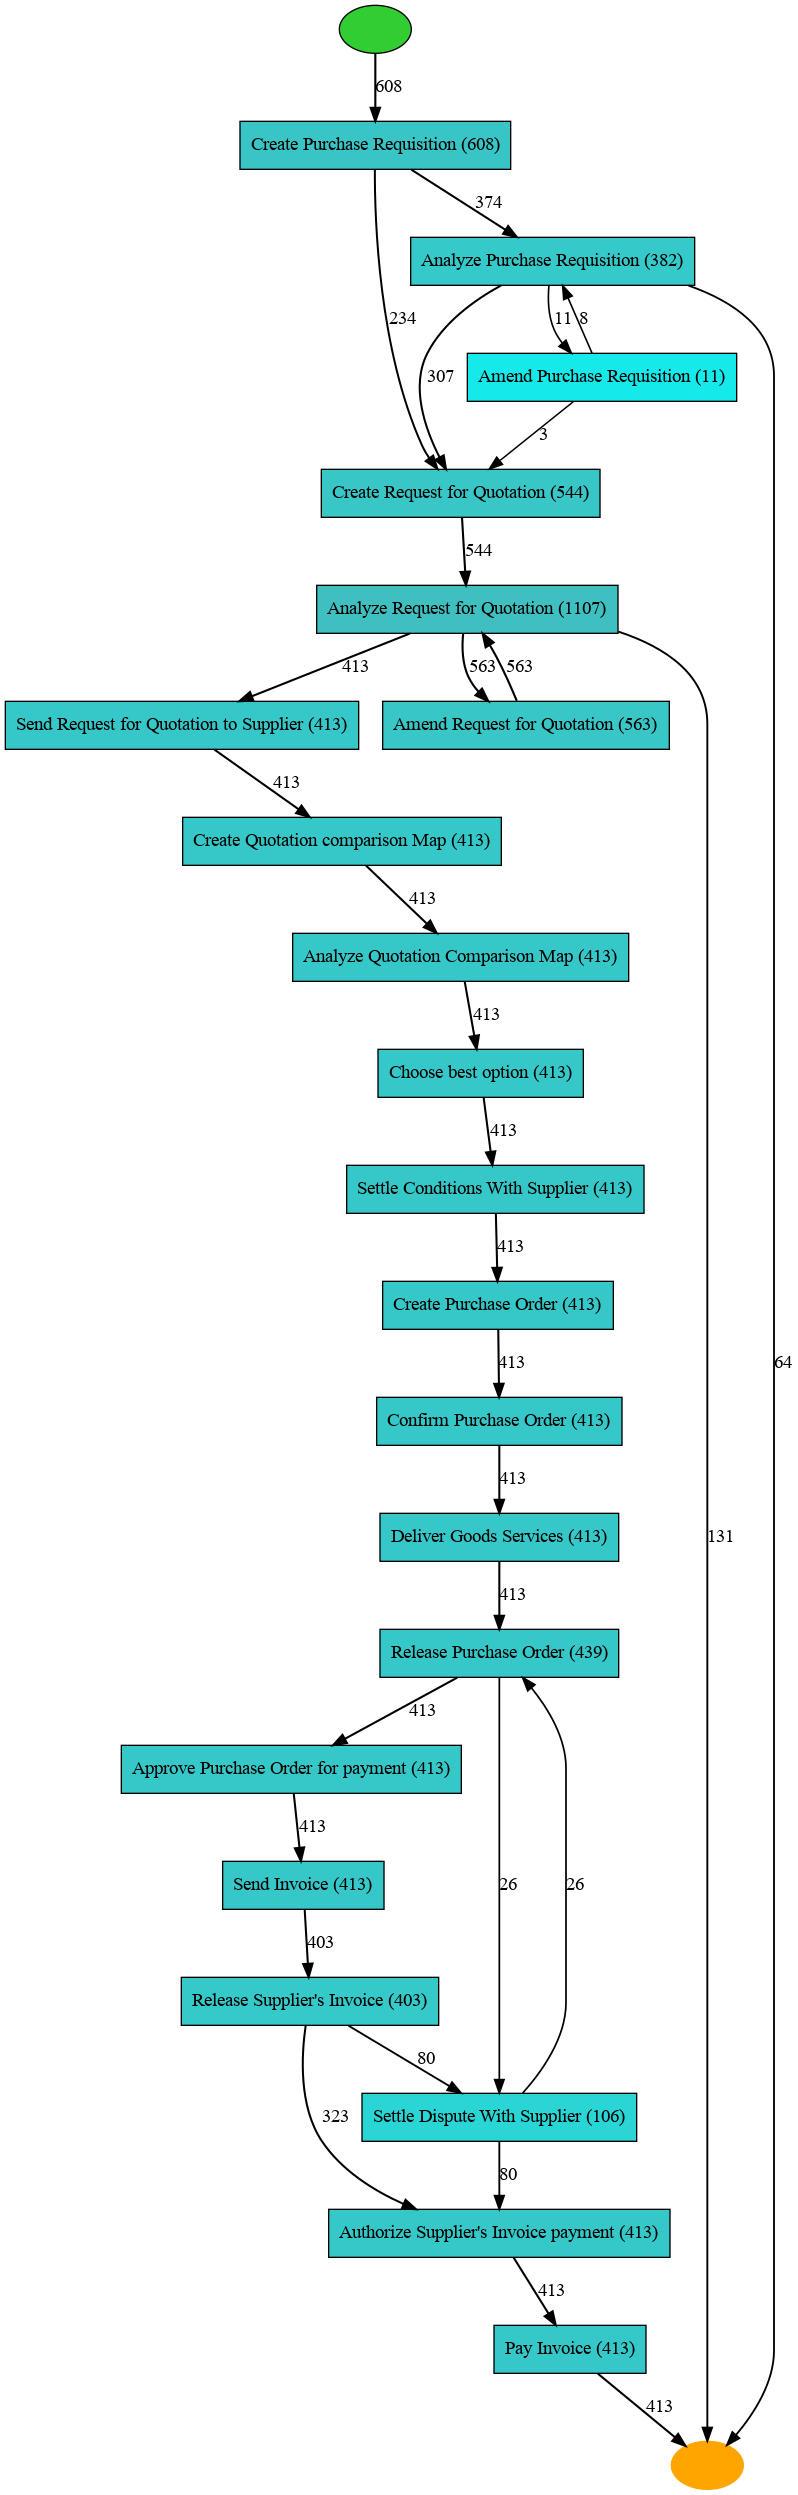

In [62]:

df_tmp = pm4py.format_dataframe(df, case_id='Case ID', activity_key='Activity', timestamp_key='Complete Timestamp', start_timestamp_key='Start Timestamp')
log = pm4py.convert_to_event_log(df_tmp)

process = pm4py.discover_heuristics_net(log)
pm4py.view_heuristics_net(process)


### Quantos casos atendem SLA de 21 dias?

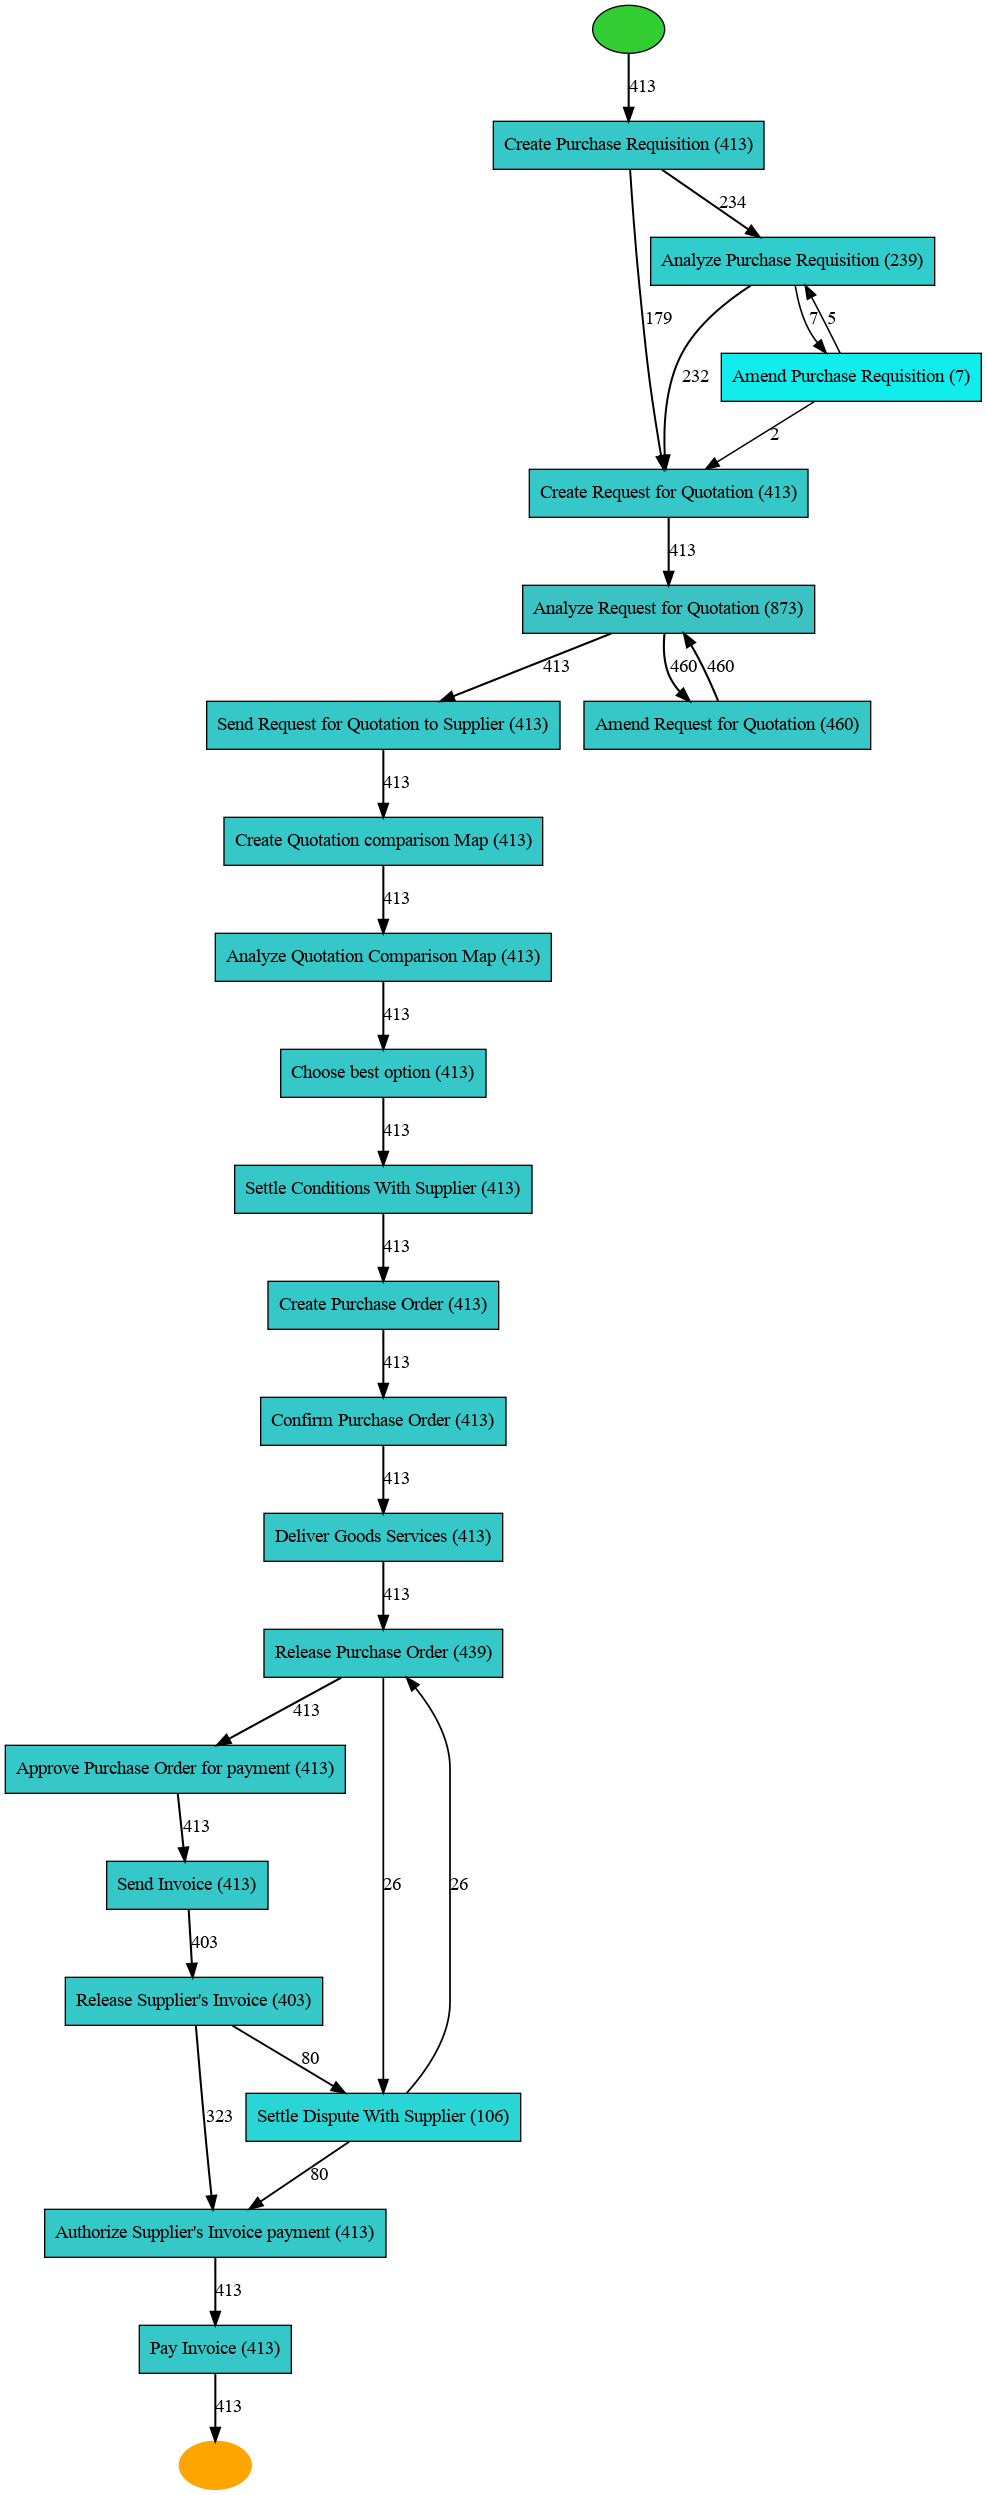

In [100]:

casos_completos = df[df['Activity'] == 'Pay Invoice']['Case ID'].unique()
df_completos = df[df['Case ID'].isin(casos_completos)]

df_completos = pm4py.format_dataframe(df_completos.copy(), case_id='Case ID', activity_key='Activity', timestamp_key='Complete Timestamp', start_timestamp_key='Start Timestamp')
log = pm4py.convert_to_event_log(df_completos)

process = pm4py.discover_heuristics_net(log)
pm4py.view_heuristics_net(process)



In [179]:
sla_days = 21

duration_in_days = np.divide(pm4py.get_all_case_durations(log, business_hours = False), 60 * 60 * 24)

meet = np.array([t for t in duration_in_days if t <= sla_days], dtype=float)
dont_meet = np.array([t for t in duration_in_days if t > sla_days], dtype=float)

propocao = len(meet) / len(duration_in_days)
print('A proporção é de %s%%.' % round(propocao * 100, 2))


A proporção é de 79.9%.


#### Diferenças entre atendimento ao SLA

In [180]:
print(50 * '=')
print(f'Tempos dos fluxos segundo SLA de {sla_days} dias.')
print(50 * '=')
print('Cases que atendem: ')
print(f'Mínimo = {round(np.min(meet), 1)} dias')
print(f'Média = {round(np.mean(meet), 1)} dias')
print(f'Máximo = {round(np.max(meet), 1)} dias')

print(50 * '-')
print('Cases que não atendem: ')
print(f'Mínimo = {round(np.min(dont_meet), 1)} dias')
print(f'Média = {round(np.mean(dont_meet), 1)} dias')
print(f'Máximo = {round(np.max(dont_meet), 1)} dias')

print(50 * '=')



Tempos dos fluxos segundo SLA de 21 dias.
Cases que atendem: 
Mínimo = 3.6 dias
Média = 12.5 dias
Máximo = 17.3 dias
--------------------------------------------------
Cases que não atendem: 
Mínimo = 76.0 dias
Média = 87.6 dias
Máximo = 108.3 dias


In [182]:

atividades = df_completos[['Case ID', 'Activity', 'Resource', 'Start Timestamp', 'Complete Timestamp']].copy()

atividades['Start Timestamp'] = pd.to_datetime(atividades['Start Timestamp'])
atividades['Complete Timestamp'] = pd.to_datetime(atividades['Complete Timestamp'])

atividades['Timespan'] = atividades['Complete Timestamp'] - atividades['Start Timestamp']

atividades.drop(['Start Timestamp', 'Complete Timestamp'], axis=1, inplace=True)

tempos = atividades[['Case ID', 'Activity', 'Timespan']].groupby(['Activity', 'Case ID']).aggregate(['count', 'sum'])
tempos.reset_index(drop=False, inplace=True)
tempos.drop('Case ID', axis=1, inplace=True)

#tempos['TempoMedio'] = tempos[('Timespan', 'sum')] / tempos[('Timespan', 'count')]
tempos.groupby('Activity').mean().sort_values(('Timespan', 'sum'), ascending=False)
#tempos

/tmp/ipykernel_51463/3199042297.py:12: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  tempos.drop('Case ID', axis=1, inplace=True)
/tmp/ipykernel_51463/3199042297.py:15: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  tempos.groupby('Activity').mean().sort_values(('Timespan', 'sum'), ascending=False)


Timespan                          
                                           count                       sum
Activity                                                                  
Deliver Goods Services                  1.000000 1 days 01:17:55.496368038
Settle Conditions With Supplier         1.000000 0 days 08:59:49.104116222
Create Quotation comparison Map         1.000000 0 days 03:22:35.012106537
Settle Dispute With Supplier            1.029126 0 days 02:38:09.902912621
Analyze Request for Quotation           2.113801 0 days 00:48:30.944309927
Create Purchase Requisition             1.000000 0 days 00:31:22.808716707
Amend Purchase Requisition              1.000000 0 days 00:28:51.428571428
Amend Request for Quotation             2.446809 0 days 00:25:55.851063829
Send Request for Quotation to Supplier  1.000000 0 days 00:23:35.738498789
Analyze Quotation Comparison Map        1.000000 0 days 00:20:09.297820823
Confirm Purchase Order                  1.000000 0 days 00:19:48.523002421
Create Purchase Order                   1.000000 0 days 00:09:33.123486682
Pay Invoice                             1.000000 0 days 00:09:21.791767554
Analyze Purchase Requisition            1.021368 0 days 00:06:52.307692307
Create Request for Quotation            1.000000 0 days 00:05:19.757869249
Release Supplier's Invoice              1.000000 0 days 00:04:29.032258064
Release Purchase Order                  1.062954 0 days 00:01:03.777239709
Approve Purchase Order for payment      1.000000           0 days 00:01:00
Authorize Supplier's Invoice payment    1.000000           0 days 00:00:00
Choose best option                      1.000000           0 days 00:00:00
Send Invoice                            1.000000           0 days 00:00:00